##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE183916**

file previously downloaded:
* GSE183916_merged_objects.rds.gz

used gunzip to remove gz, then imported rds object

#### dataset is from patients with peritoneal metastasis from colorectal cancer


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE183916')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE183916"

[1] "/scratch/user/s4436039/scdata/GSE183916"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [29]:
#load all datasets
CRC <- readRDS(file = "/scratch/user/s4436039/scdata/GSE183916/GSE183916_merged_objects.rds")

In [30]:
class(CRC)

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"

In [31]:
head(CRC@meta.data) 

orig.ident    nCount_RNA nFeature_RNA loc     pat_id
AAACCTGAGAAGGTGA-1_1 SeuratProject  599        284         primary B     
AAACCTGAGAGGTTGC-1_1 SeuratProject  681        511         primary B     
AAACCTGAGCAATATG-1_1 SeuratProject  644        484         primary B     
AAACCTGAGTTACGGG-1_1 SeuratProject 6088       3250         primary B     
AAACCTGCACATCTTT-1_1 SeuratProject 5378       2846         primary B     
AAACCTGCAGCCTTTC-1_1 SeuratProject 1700       1146         primary B

### split downloaded seurat object into seperate objects for each patient and sample so each can get corresponding metadata and column names

In [32]:
table(CRC$pat_id)


    B     C     D     E     F 
12491  6065  3210  2871  4024 

In [33]:
table(CRC_B$loc)


metastasis    primary 
      6196       6295 

In [34]:
CRC_B <- subset(CRC, subset = pat_id %in% c("B"))
CRC_C <- subset(CRC, subset = pat_id %in% c("C"))
CRC_D <- subset(CRC, subset = pat_id %in% c("D"))
CRC_E <- subset(CRC, subset = pat_id %in% c("E"))
CRC_F <- subset(CRC, subset = pat_id %in% c("F"))

In [35]:
table(CRC_B$loc)
table(CRC_C$loc)
table(CRC_D$loc)
table(CRC_E$loc)
table(CRC_F$loc)


metastasis    primary 
      6196       6295 


metastasis 
      6065 


metastasis 
      3210 


metastasis 
      2871 


metastasis 
      4024 

In [36]:
CRC_B_T <- subset(CRC_B, subset = loc %in% c("primary"))
CRC_B_M <- subset(CRC_B, subset = loc %in% c("metastasis"))

In [37]:
table(CRC_B_T$loc)
table(CRC_B_M$loc)


primary 
   6295 


metastasis 
      6196 

In [38]:
head(colnames(CRC_B_T))
head(colnames(CRC_B_M))
head(colnames(CRC_C))
head(colnames(CRC_D))
head(colnames(CRC_E))
head(colnames(CRC_F))

[1] "AAACCTGAGAAGGTGA-1_1" "AAACCTGAGAGGTTGC-1_1" "AAACCTGAGCAATATG-1_1"
[4] "AAACCTGAGTTACGGG-1_1" "AAACCTGCACATCTTT-1_1" "AAACCTGCAGCCTTTC-1_1"

[1] "AAACCTGAGAAGGTTT-1_2" "AAACCTGAGGGTTTCT-1_2" "AAACCTGAGTGGAGTC-1_2"
[4] "AAACCTGCACGCTTTC-1_2" "AAACCTGCACGTCAGC-1_2" "AAACCTGCAGAGTGTG-1_2"

[1] "AAACCTGAGACACTAA-1_3" "AAACCTGAGAGGTTAT-1_3" "AAACCTGAGGTGCTTT-1_3"
[4] "AAACCTGCAACTGCTA-1_3" "AAACCTGCAAGGTTCT-1_3" "AAACCTGCACGGCCAT-1_3"

[1] "AAACCTGAGATGGGTC-1_4" "AAACCTGAGCGTGAGT-1_4" "AAACCTGAGTTATCGC-1_4"
[4] "AAACCTGCAATCTACG-1_4" "AAACCTGCACACTGCG-1_4" "AAACCTGCAGGGTATG-1_4"

[1] "AAACCTGCACCGAATT-1_5" "AAACCTGCAGATTGCT-1_5" "AAACCTGTCTCAACTT-1_5"
[4] "AAACCTGTCTCTAGGA-1_5" "AAACCTGTCTGGCGAC-1_5" "AAACGGGAGCGAAGGG-1_5"

[1] "AAACCTGGTAAGCACG-1_6" "AAACCTGGTCCAGTTA-1_6" "AAACCTGTCCCTCTTT-1_6"
[4] "AAACCTGTCTTGGGTA-1_6" "AAACGGGCACCATGTA-1_6" "AAACGGGCACGGCTAC-1_6"

In [39]:
#Add dataset info to colnames
colnames(CRC_B_T) <- paste0("GSE183916_CRC_prim_ptB_", colnames(CRC_B_T))
colnames(CRC_B_M) <- paste0("GSE183916_CRC_mets_ptB_", colnames(CRC_B_M))
colnames(CRC_C) <- paste0("GSE183916_CRC_mets_ptC_", colnames(CRC_C))
colnames(CRC_D) <- paste0("GSE183916_CRC_mets_ptD_", colnames(CRC_D))
colnames(CRC_E) <- paste0("GSE183916_CRC_mets_ptE_", colnames(CRC_E))
colnames(CRC_F) <- paste0("GSE183916_CRC_mets_ptF_", colnames(CRC_F))

In [40]:
head(colnames(CRC_B_T))
head(colnames(CRC_B_M))
head(colnames(CRC_C))
head(colnames(CRC_D))
head(colnames(CRC_E))
head(colnames(CRC_F))

[1] "GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1"
[2] "GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1"
[3] "GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1"
[4] "GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1"
[5] "GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1"
[6] "GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1"

[1] "GSE183916_CRC_mets_ptB_AAACCTGAGAAGGTTT-1_2"
[2] "GSE183916_CRC_mets_ptB_AAACCTGAGGGTTTCT-1_2"
[3] "GSE183916_CRC_mets_ptB_AAACCTGAGTGGAGTC-1_2"
[4] "GSE183916_CRC_mets_ptB_AAACCTGCACGCTTTC-1_2"
[5] "GSE183916_CRC_mets_ptB_AAACCTGCACGTCAGC-1_2"
[6] "GSE183916_CRC_mets_ptB_AAACCTGCAGAGTGTG-1_2"

[1] "GSE183916_CRC_mets_ptC_AAACCTGAGACACTAA-1_3"
[2] "GSE183916_CRC_mets_ptC_AAACCTGAGAGGTTAT-1_3"
[3] "GSE183916_CRC_mets_ptC_AAACCTGAGGTGCTTT-1_3"
[4] "GSE183916_CRC_mets_ptC_AAACCTGCAACTGCTA-1_3"
[5] "GSE183916_CRC_mets_ptC_AAACCTGCAAGGTTCT-1_3"
[6] "GSE183916_CRC_mets_ptC_AAACCTGCACGGCCAT-1_3"

[1] "GSE183916_CRC_mets_ptD_AAACCTGAGATGGGTC-1_4"
[2] "GSE183916_CRC_mets_ptD_AAACCTGAGCGTGAGT-1_4"
[3] "GSE183916_CRC_mets_ptD_AAACCTGAGTTATCGC-1_4"
[4] "GSE183916_CRC_mets_ptD_AAACCTGCAATCTACG-1_4"
[5] "GSE183916_CRC_mets_ptD_AAACCTGCACACTGCG-1_4"
[6] "GSE183916_CRC_mets_ptD_AAACCTGCAGGGTATG-1_4"

[1] "GSE183916_CRC_mets_ptE_AAACCTGCACCGAATT-1_5"
[2] "GSE183916_CRC_mets_ptE_AAACCTGCAGATTGCT-1_5"
[3] "GSE183916_CRC_mets_ptE_AAACCTGTCTCAACTT-1_5"
[4] "GSE183916_CRC_mets_ptE_AAACCTGTCTCTAGGA-1_5"
[5] "GSE183916_CRC_mets_ptE_AAACCTGTCTGGCGAC-1_5"
[6] "GSE183916_CRC_mets_ptE_AAACGGGAGCGAAGGG-1_5"

[1] "GSE183916_CRC_mets_ptF_AAACCTGGTAAGCACG-1_6"
[2] "GSE183916_CRC_mets_ptF_AAACCTGGTCCAGTTA-1_6"
[3] "GSE183916_CRC_mets_ptF_AAACCTGTCCCTCTTT-1_6"
[4] "GSE183916_CRC_mets_ptF_AAACCTGTCTTGGGTA-1_6"
[5] "GSE183916_CRC_mets_ptF_AAACGGGCACCATGTA-1_6"
[6] "GSE183916_CRC_mets_ptF_AAACGGGCACGGCTAC-1_6"

In [41]:
#add metadata to each sample
CRC_B_T@meta.data$sample_type <- "tumour"
CRC_B_T@meta.data$cancer_type <- "CRC primary"
CRC_B_T@meta.data$patient_id <- "B"
CRC_B_T@meta.data$sample_id <- "GSE183916_CRC_primary_ptB"

#add metadata to each sample
CRC_B_M@meta.data$sample_type <- "tumour"
CRC_B_M@meta.data$cancer_type <- "CRC mets"
CRC_B_M@meta.data$patient_id <- "B"
CRC_B_M@meta.data$sample_id <- "GSE183916_CRC_mets_ptB"

#add metadata to each sample
CRC_C@meta.data$sample_type <- "tumour"
CRC_C@meta.data$cancer_type <- "CRC mets"
CRC_C@meta.data$patient_id <- "C"
CRC_C@meta.data$sample_id <- "GSE183916_CRC_mets_ptC"

#add metadata to each sample
CRC_D@meta.data$sample_type <- "tumour"
CRC_D@meta.data$cancer_type <- "CRC mets"
CRC_D@meta.data$patient_id <- "D"
CRC_D@meta.data$sample_id <- "GSE183916_CRC_mets_ptD"

#add metadata to each sample
CRC_E@meta.data$sample_type <- "tumour"
CRC_E@meta.data$cancer_type <- "CRC mets"
CRC_E@meta.data$patient_id <- "E"
CRC_E@meta.data$sample_id <- "GSE183916_CRC_mets_ptE"

#add metadata to each sample
CRC_F@meta.data$sample_type <- "tumour"
CRC_F@meta.data$cancer_type <- "CRC mets"
CRC_F@meta.data$patient_id <- "F"
CRC_F@meta.data$sample_id <- "GSE183916_CRC_mets_ptF"

In [43]:
head(CRC_B_T) 
head(CRC_B_M) 
head(CRC_C) 
head(CRC_D) 
head(CRC_E) 
head(CRC_F) 


orig.ident    nCount_RNA
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 SeuratProject  599      
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 SeuratProject  681      
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 SeuratProject  644      
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 SeuratProject 6088      
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 SeuratProject 5378      
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 SeuratProject 1700      
GSE183916_CRC_prim_ptB_AAACCTGCAGGCAGTA-1_1 SeuratProject 1415      
GSE183916_CRC_prim_ptB_AAACCTGCATGGTAGG-1_1 SeuratProject 9391      
GSE183916_CRC_prim_ptB_AAACCTGCATTCACTT-1_1 SeuratProject 3201      
GSE183916_CRC_prim_ptB_AAACCTGGTAAGGGAA-1_1 SeuratProject 9587      
                                            nFeature_RNA loc     pat_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1  284         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1  511         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1  484         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 3250         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 2846         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 1146         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCAGGCAGTA-1_1  867         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCATGGTAGG-1_1 3424         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCATTCACTT-1_1 1743         primary B     
GSE183916_CRC_prim_ptB_AAACCTGGTAAGGGAA-1_1 4138         primary B     
                                            sample_type cancer_type patient_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCAGGCAGTA-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCATGGTAGG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCATTCACTT-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGGTAAGGGAA-1_1 tumour      CRC primary B         
                                            sample_id                
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCAGGCAGTA-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCATGGTAGG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCATTCACTT-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGGTAAGGGAA-1_1 GSE183916_CRC_primary_ptB

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptB_AAACCTGAGAAGGTTT-1_2 SeuratProject  534      
GSE183916_CRC_mets_ptB_AAACCTGAGGGTTTCT-1_2 SeuratProject 4017      
GSE183916_CRC_mets_ptB_AAACCTGAGTGGAGTC-1_2 SeuratProject 1548      
GSE183916_CRC_mets_ptB_AAACCTGCACGCTTTC-1_2 SeuratProject 1568      
GSE183916_CRC_mets_ptB_AAACCTGCACGTCAGC-1_2 SeuratProject 3359      
GSE183916_CRC_mets_ptB_AAACCTGCAGAGTGTG-1_2 SeuratProject 9669      
GSE183916_CRC_mets_ptB_AAACCTGCAGTCAGCC-1_2 SeuratProject 1052      
GSE183916_CRC_mets_ptB_AAACCTGGTGTTGGGA-1_2 SeuratProject 1698      
GSE183916_CRC_mets_ptB_AAACCTGGTTATGCGT-1_2 SeuratProject 7021      
GSE183916_CRC_mets_ptB_AAACCTGTCCCTTGTG-1_2 SeuratProject 3935      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptB_AAACCTGAGAAGGTTT-1_2  419         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGAGGGTTTCT-1_2 2299         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGAGTGGAGTC-1_2  914         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGCACGCTTTC-1_2 1146         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGCACGTCAGC-1_2 2043         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGCAGAGTGTG-1_2 3591         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGCAGTCAGCC-1_2  780         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGGTGTTGGGA-1_2 1186         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGGTTATGCGT-1_2 3109         metastasis B     
GSE183916_CRC_mets_ptB_AAACCTGTCCCTTGTG-1_2 2156         metastasis B     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptB_AAACCTGAGAAGGTTT-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGAGGGTTTCT-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGAGTGGAGTC-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGCACGCTTTC-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGCACGTCAGC-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGCAGAGTGTG-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGCAGTCAGCC-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGGTGTTGGGA-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGGTTATGCGT-1_2 tumour      CRC mets    B         
GSE183916_CRC_mets_ptB_AAACCTGTCCCTTGTG-1_2 tumour      CRC mets    B         
                                            sample_id             
GSE183916_CRC_mets_ptB_AAACCTGAGAAGGTTT-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGAGGGTTTCT-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGAGTGGAGTC-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGCACGCTTTC-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGCACGTCAGC-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGCAGAGTGTG-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGCAGTCAGCC-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGGTGTTGGGA-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGGTTATGCGT-1_2 GSE183916_CRC_mets_ptB
GSE183916_CRC_mets_ptB_AAACCTGTCCCTTGTG-1_2 GSE183916_CRC_mets_ptB

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptC_AAACCTGAGACACTAA-1_3 SeuratProject  663      
GSE183916_CRC_mets_ptC_AAACCTGAGAGGTTAT-1_3 SeuratProject 2598      
GSE183916_CRC_mets_ptC_AAACCTGAGGTGCTTT-1_3 SeuratProject 2622      
GSE183916_CRC_mets_ptC_AAACCTGCAACTGCTA-1_3 SeuratProject  626      
GSE183916_CRC_mets_ptC_AAACCTGCAAGGTTCT-1_3 SeuratProject  544      
GSE183916_CRC_mets_ptC_AAACCTGCACGGCCAT-1_3 SeuratProject 4637      
GSE183916_CRC_mets_ptC_AAACCTGCATCACGTA-1_3 SeuratProject 4438      
GSE183916_CRC_mets_ptC_AAACCTGCATCCTTGC-1_3 SeuratProject 2029      
GSE183916_CRC_mets_ptC_AAACCTGGTACCGAGA-1_3 SeuratProject 3943      
GSE183916_CRC_mets_ptC_AAACCTGTCAACGAAA-1_3 SeuratProject 2730      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptC_AAACCTGAGACACTAA-1_3  385         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGAGAGGTTAT-1_3 1660         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGAGGTGCTTT-1_3 1611         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGCAACTGCTA-1_3  357         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGCAAGGTTCT-1_3  355         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGCACGGCCAT-1_3 2693         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGCATCACGTA-1_3 2522         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGCATCCTTGC-1_3 1288         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGGTACCGAGA-1_3 2059         metastasis C     
GSE183916_CRC_mets_ptC_AAACCTGTCAACGAAA-1_3 1722         metastasis C     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptC_AAACCTGAGACACTAA-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGAGAGGTTAT-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGAGGTGCTTT-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGCAACTGCTA-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGCAAGGTTCT-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGCACGGCCAT-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGCATCACGTA-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGCATCCTTGC-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGGTACCGAGA-1_3 tumour      CRC mets    C         
GSE183916_CRC_mets_ptC_AAACCTGTCAACGAAA-1_3 tumour      CRC mets    C         
                                            sample_id             
GSE183916_CRC_mets_ptC_AAACCTGAGACACTAA-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGAGAGGTTAT-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGAGGTGCTTT-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGCAACTGCTA-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGCAAGGTTCT-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGCACGGCCAT-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGCATCACGTA-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGCATCCTTGC-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGGTACCGAGA-1_3 GSE183916_CRC_mets_ptC
GSE183916_CRC_mets_ptC_AAACCTGTCAACGAAA-1_3 GSE183916_CRC_mets_ptC

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptD_AAACCTGAGATGGGTC-1_4 SeuratProject 1012      
GSE183916_CRC_mets_ptD_AAACCTGAGCGTGAGT-1_4 SeuratProject 1451      
GSE183916_CRC_mets_ptD_AAACCTGAGTTATCGC-1_4 SeuratProject  400      
GSE183916_CRC_mets_ptD_AAACCTGCAATCTACG-1_4 SeuratProject  556      
GSE183916_CRC_mets_ptD_AAACCTGCACACTGCG-1_4 SeuratProject  351      
GSE183916_CRC_mets_ptD_AAACCTGCAGGGTATG-1_4 SeuratProject  366      
GSE183916_CRC_mets_ptD_AAACCTGCATCACAAC-1_4 SeuratProject  574      
GSE183916_CRC_mets_ptD_AAACCTGCATGCATGT-1_4 SeuratProject 1790      
GSE183916_CRC_mets_ptD_AAACCTGCATGGTTGT-1_4 SeuratProject 2177      
GSE183916_CRC_mets_ptD_AAACCTGGTAAGGGAA-1_4 SeuratProject  937      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptD_AAACCTGAGATGGGTC-1_4  759         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGAGCGTGAGT-1_4 1000         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGAGTTATCGC-1_4  276         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCAATCTACG-1_4  420         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCACACTGCG-1_4  162         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCAGGGTATG-1_4  262         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCATCACAAC-1_4  419         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCATGCATGT-1_4 1301         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGCATGGTTGT-1_4 1433         metastasis D     
GSE183916_CRC_mets_ptD_AAACCTGGTAAGGGAA-1_4  661         metastasis D     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptD_AAACCTGAGATGGGTC-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGAGCGTGAGT-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGAGTTATCGC-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCAATCTACG-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCACACTGCG-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCAGGGTATG-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCATCACAAC-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCATGCATGT-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGCATGGTTGT-1_4 tumour      CRC mets    D         
GSE183916_CRC_mets_ptD_AAACCTGGTAAGGGAA-1_4 tumour      CRC mets    D         
                                            sample_id             
GSE183916_CRC_mets_ptD_AAACCTGAGATGGGTC-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGAGCGTGAGT-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGAGTTATCGC-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCAATCTACG-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCACACTGCG-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCAGGGTATG-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCATCACAAC-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCATGCATGT-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGCATGGTTGT-1_4 GSE183916_CRC_mets_ptD
GSE183916_CRC_mets_ptD_AAACCTGGTAAGGGAA-1_4 GSE183916_CRC_mets_ptD

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptE_AAACCTGCACCGAATT-1_5 SeuratProject  803      
GSE183916_CRC_mets_ptE_AAACCTGCAGATTGCT-1_5 SeuratProject 1567      
GSE183916_CRC_mets_ptE_AAACCTGTCTCAACTT-1_5 SeuratProject 1299      
GSE183916_CRC_mets_ptE_AAACCTGTCTCTAGGA-1_5 SeuratProject  627      
GSE183916_CRC_mets_ptE_AAACCTGTCTGGCGAC-1_5 SeuratProject 1754      
GSE183916_CRC_mets_ptE_AAACGGGAGCGAAGGG-1_5 SeuratProject  635      
GSE183916_CRC_mets_ptE_AAACGGGCAATCTACG-1_5 SeuratProject 4562      
GSE183916_CRC_mets_ptE_AAACGGGGTAAATGTG-1_5 SeuratProject  509      
GSE183916_CRC_mets_ptE_AAACGGGGTCTTCTCG-1_5 SeuratProject 2887      
GSE183916_CRC_mets_ptE_AAACGGGTCACAGTAC-1_5 SeuratProject  978      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptE_AAACCTGCACCGAATT-1_5  162         metastasis E     
GSE183916_CRC_mets_ptE_AAACCTGCAGATTGCT-1_5 1081         metastasis E     
GSE183916_CRC_mets_ptE_AAACCTGTCTCAACTT-1_5  910         metastasis E     
GSE183916_CRC_mets_ptE_AAACCTGTCTCTAGGA-1_5  487         metastasis E     
GSE183916_CRC_mets_ptE_AAACCTGTCTGGCGAC-1_5 1205         metastasis E     
GSE183916_CRC_mets_ptE_AAACGGGAGCGAAGGG-1_5  437         metastasis E     
GSE183916_CRC_mets_ptE_AAACGGGCAATCTACG-1_5 2513         metastasis E     
GSE183916_CRC_mets_ptE_AAACGGGGTAAATGTG-1_5  369         metastasis E     
GSE183916_CRC_mets_ptE_AAACGGGGTCTTCTCG-1_5 1902         metastasis E     
GSE183916_CRC_mets_ptE_AAACGGGTCACAGTAC-1_5  634         metastasis E     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptE_AAACCTGCACCGAATT-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACCTGCAGATTGCT-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACCTGTCTCAACTT-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACCTGTCTCTAGGA-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACCTGTCTGGCGAC-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACGGGAGCGAAGGG-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACGGGCAATCTACG-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACGGGGTAAATGTG-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACGGGGTCTTCTCG-1_5 tumour      CRC mets    E         
GSE183916_CRC_mets_ptE_AAACGGGTCACAGTAC-1_5 tumour      CRC mets    E         
                                            sample_id             
GSE183916_CRC_mets_ptE_AAACCTGCACCGAATT-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACCTGCAGATTGCT-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACCTGTCTCAACTT-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACCTGTCTCTAGGA-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACCTGTCTGGCGAC-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACGGGAGCGAAGGG-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACGGGCAATCTACG-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACGGGGTAAATGTG-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACGGGGTCTTCTCG-1_5 GSE183916_CRC_mets_ptE
GSE183916_CRC_mets_ptE_AAACGGGTCACAGTAC-1_5 GSE183916_CRC_mets_ptE

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptF_AAACCTGGTAAGCACG-1_6 SeuratProject  705      
GSE183916_CRC_mets_ptF_AAACCTGGTCCAGTTA-1_6 SeuratProject 9775      
GSE183916_CRC_mets_ptF_AAACCTGTCCCTCTTT-1_6 SeuratProject 6126      
GSE183916_CRC_mets_ptF_AAACCTGTCTTGGGTA-1_6 SeuratProject 1076      
GSE183916_CRC_mets_ptF_AAACGGGCACCATGTA-1_6 SeuratProject 7523      
GSE183916_CRC_mets_ptF_AAACGGGCACGGCTAC-1_6 SeuratProject 4134      
GSE183916_CRC_mets_ptF_AAACGGGGTCCAGTAT-1_6 SeuratProject 1038      
GSE183916_CRC_mets_ptF_AAACGGGTCGATGAGG-1_6 SeuratProject 3691      
GSE183916_CRC_mets_ptF_AAACGGGTCTTACCGC-1_6 SeuratProject 3427      
GSE183916_CRC_mets_ptF_AAAGATGAGCTAGCCC-1_6 SeuratProject 2738      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptF_AAACCTGGTAAGCACG-1_6  569         metastasis F     
GSE183916_CRC_mets_ptF_AAACCTGGTCCAGTTA-1_6 4110         metastasis F     
GSE183916_CRC_mets_ptF_AAACCTGTCCCTCTTT-1_6 2996         metastasis F     
GSE183916_CRC_mets_ptF_AAACCTGTCTTGGGTA-1_6  733         metastasis F     
GSE183916_CRC_mets_ptF_AAACGGGCACCATGTA-1_6 3487         metastasis F     
GSE183916_CRC_mets_ptF_AAACGGGCACGGCTAC-1_6 1931         metastasis F     
GSE183916_CRC_mets_ptF_AAACGGGGTCCAGTAT-1_6  841         metastasis F     
GSE183916_CRC_mets_ptF_AAACGGGTCGATGAGG-1_6 2073         metastasis F     
GSE183916_CRC_mets_ptF_AAACGGGTCTTACCGC-1_6 1766         metastasis F     
GSE183916_CRC_mets_ptF_AAAGATGAGCTAGCCC-1_6 1752         metastasis F     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptF_AAACCTGGTAAGCACG-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACCTGGTCCAGTTA-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACCTGTCCCTCTTT-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACCTGTCTTGGGTA-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACGGGCACCATGTA-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACGGGCACGGCTAC-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACGGGGTCCAGTAT-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACGGGTCGATGAGG-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAACGGGTCTTACCGC-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_AAAGATGAGCTAGCCC-1_6 tumour      CRC mets    F         
                                            sample_id             
GSE183916_CRC_mets_ptF_AAACCTGGTAAGCACG-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACCTGGTCCAGTTA-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACCTGTCCCTCTTT-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACCTGTCTTGGGTA-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACGGGCACCATGTA-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACGGGCACGGCTAC-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACGGGGTCCAGTAT-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACGGGTCGATGAGG-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAACGGGTCTTACCGC-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_AAAGATGAGCTAGCCC-1_6 GSE183916_CRC_mets_ptF

In [44]:
#Merge seurat objects
CRCt <- merge(CRC_B_T, y = c(CRC_B_M, CRC_C, CRC_D, CRC_E, CRC_F), project = "GSE183916")

In [45]:
CRCt
head(CRCt@meta.data)
tail(CRCt@meta.data)

An object of class Seurat 
33808 features across 28661 samples within 1 assay 
Active assay: RNA (33808 features, 0 variable features)
 2 layers present: counts, data

orig.ident    nCount_RNA
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 SeuratProject  599      
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 SeuratProject  681      
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 SeuratProject  644      
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 SeuratProject 6088      
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 SeuratProject 5378      
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 SeuratProject 1700      
                                            nFeature_RNA loc     pat_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1  284         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1  511         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1  484         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 3250         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 2846         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 1146         primary B     
                                            sample_type cancer_type patient_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 tumour      CRC primary B         
                                            sample_id                
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 GSE183916_CRC_primary_ptB

orig.ident    nCount_RNA
GSE183916_CRC_mets_ptF_TTTGTCAAGAAGGGTA-1_6 SeuratProject 1106      
GSE183916_CRC_mets_ptF_TTTGTCACACAGCCCA-1_6 SeuratProject  769      
GSE183916_CRC_mets_ptF_TTTGTCAGTCGCGTGT-1_6 SeuratProject 4196      
GSE183916_CRC_mets_ptF_TTTGTCAGTCTAGTGT-1_6 SeuratProject  941      
GSE183916_CRC_mets_ptF_TTTGTCAGTGAGTGAC-1_6 SeuratProject 1141      
GSE183916_CRC_mets_ptF_TTTGTCATCAGTGTTG-1_6 SeuratProject 4132      
                                            nFeature_RNA loc        pat_id
GSE183916_CRC_mets_ptF_TTTGTCAAGAAGGGTA-1_6  861         metastasis F     
GSE183916_CRC_mets_ptF_TTTGTCACACAGCCCA-1_6  676         metastasis F     
GSE183916_CRC_mets_ptF_TTTGTCAGTCGCGTGT-1_6 1582         metastasis F     
GSE183916_CRC_mets_ptF_TTTGTCAGTCTAGTGT-1_6  807         metastasis F     
GSE183916_CRC_mets_ptF_TTTGTCAGTGAGTGAC-1_6  826         metastasis F     
GSE183916_CRC_mets_ptF_TTTGTCATCAGTGTTG-1_6 2078         metastasis F     
                                            sample_type cancer_type patient_id
GSE183916_CRC_mets_ptF_TTTGTCAAGAAGGGTA-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_TTTGTCACACAGCCCA-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_TTTGTCAGTCGCGTGT-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_TTTGTCAGTCTAGTGT-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_TTTGTCAGTGAGTGAC-1_6 tumour      CRC mets    F         
GSE183916_CRC_mets_ptF_TTTGTCATCAGTGTTG-1_6 tumour      CRC mets    F         
                                            sample_id             
GSE183916_CRC_mets_ptF_TTTGTCAAGAAGGGTA-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_TTTGTCACACAGCCCA-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_TTTGTCAGTCGCGTGT-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_TTTGTCAGTCTAGTGT-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_TTTGTCAGTGAGTGAC-1_6 GSE183916_CRC_mets_ptF
GSE183916_CRC_mets_ptF_TTTGTCATCAGTGTTG-1_6 GSE183916_CRC_mets_ptF

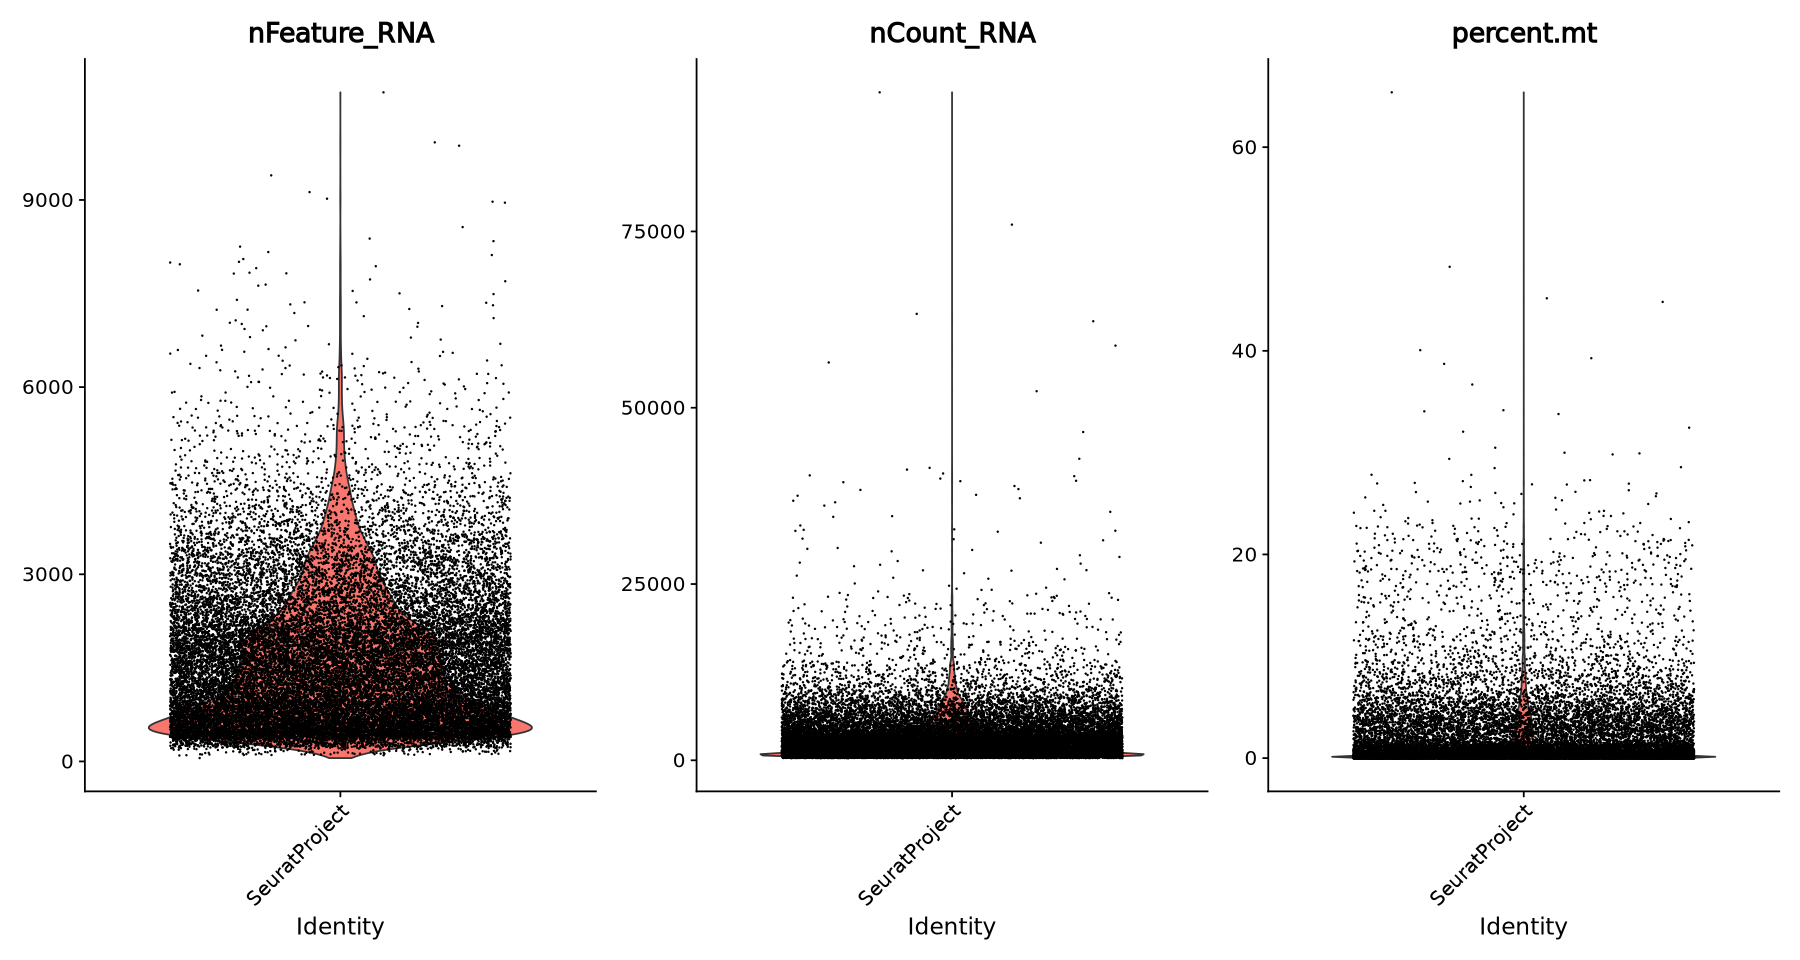

In [46]:
#QC Steps 
CRCt[["percent.mt"]] <- PercentageFeatureSet(CRCt, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(CRCt, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [47]:
#Normalise the data
CRCt <- NormalizeData(CRCt)

In [48]:
#Find variable features
CRCt <- FindVariableFeatures(CRCt, selection.method = "vst", nfeatures = 2000)

In [49]:
#Scale the data
CRCt <- ScaleData(CRCt, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [50]:
#Run PCA
CRCt <- RunPCA(CRCt, features = VariableFeatures(object = CRCt))

PC_ 1 
Positive:  GRIN2B, XACT, NPSR1, CFTR, CADPS, LINC01876, SLC12A2, CEMIP, SAMD5, HCN1 
	   GNGT1, AC074237.1, GAS2L3, SHROOM3, PIGR, AC009975.1, TNS4, LINC01811, LINC01748, DCDC2 
	   PURPL, CYP4F12, MUC13, AL033504.1, AL035446.2, HS6ST2, AL022068.1, AC099792.1, FRMD5, ONECUT3 
Negative:  CALD1, COL5A2, COL1A2, COL3A1, IGFBP7, FBXL7, ZFPM2, CDH11, COL6A3, SULF1 
	   FBN1, COL5A1, COL8A1, COL12A1, BICC1, FAP, TCF4, THBS2, BNC2, FN1 
	   VCAN, ANTXR1, COL1A1, NOX4, DGKI, ITGBL1, TENM4, SGIP1, COL11A1, MAGI2 
PC_ 2 
Positive:  SLC12A2, CEMIP, LINC01876, SEMA5A, CACNA1C, CDH11, CADPS, PLCB4, TPM1, GRIN2B 
	   BICC1, PRKG1, THSD4, XACT, LINC01748, CFTR, APBB2, SULF1, COL5A1, COL5A2 
	   SAMD5, THBS2, COL6A3, CALD1, ITGBL1, AL022068.1, GNGT1, COL8A1, NPSR1, POU6F2 
Negative:  DOCK2, DOCK4, DOCK8, SFMBT2, CHST11, MSR1, PTPRC, SLC8A1, ELMO1, SAMSN1 
	   MERTK, CIITA, QKI, DOCK10, ARHGAP15, SRGN, PREX1, NPL, FAM49A, DPYD 
	   ZNF331, FRMD4B, FCGR2A, RGS1, MARCH1, RAB31, CD86, PIK3R5, GLUL,

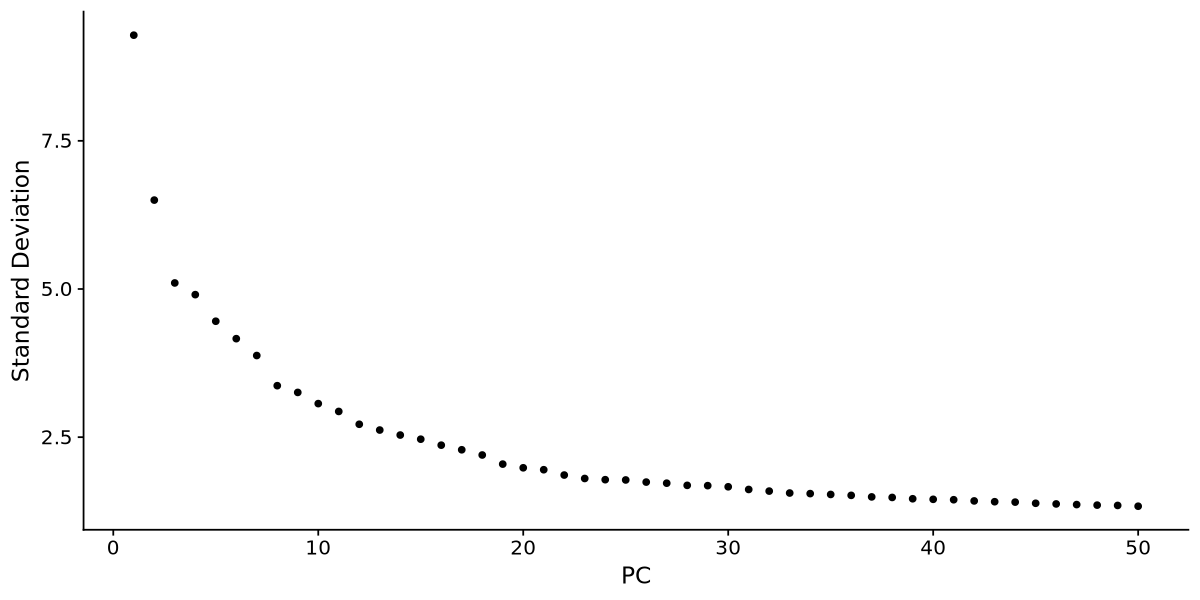

In [51]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(CRCt, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [52]:
#Find neighbours (make sure number matches no. features chosen above)
CRCt <- FindNeighbors(CRCt, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [53]:
#Run UMAP
CRCt <- RunUMAP(CRCt, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:41:22 UMAP embedding parameters a = 0.9922 b = 1.112

14:41:22 Read 28661 rows and found 40 numeric columns

14:41:22 Using Annoy for neighbor search, n_neighbors = 30

14:41:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:41:24 Writing NN index file to temp file /scratch/temp/9601764/RtmpROfnNY/file16397d755bb1e

14:41:24 Searching Annoy index using 1 thread, search_k = 3000

14:41:31 Annoy recall = 100%

14:41:32 Commencing smooth kNN distance calibration using 1 thread
 with t

In [54]:
#Cluster, resolution here set to 0.2
CRCt <- FindClusters(CRCt, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 28661
Number of edges: 1134721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9662
Number of communities: 17
Elapsed time: 3 seconds


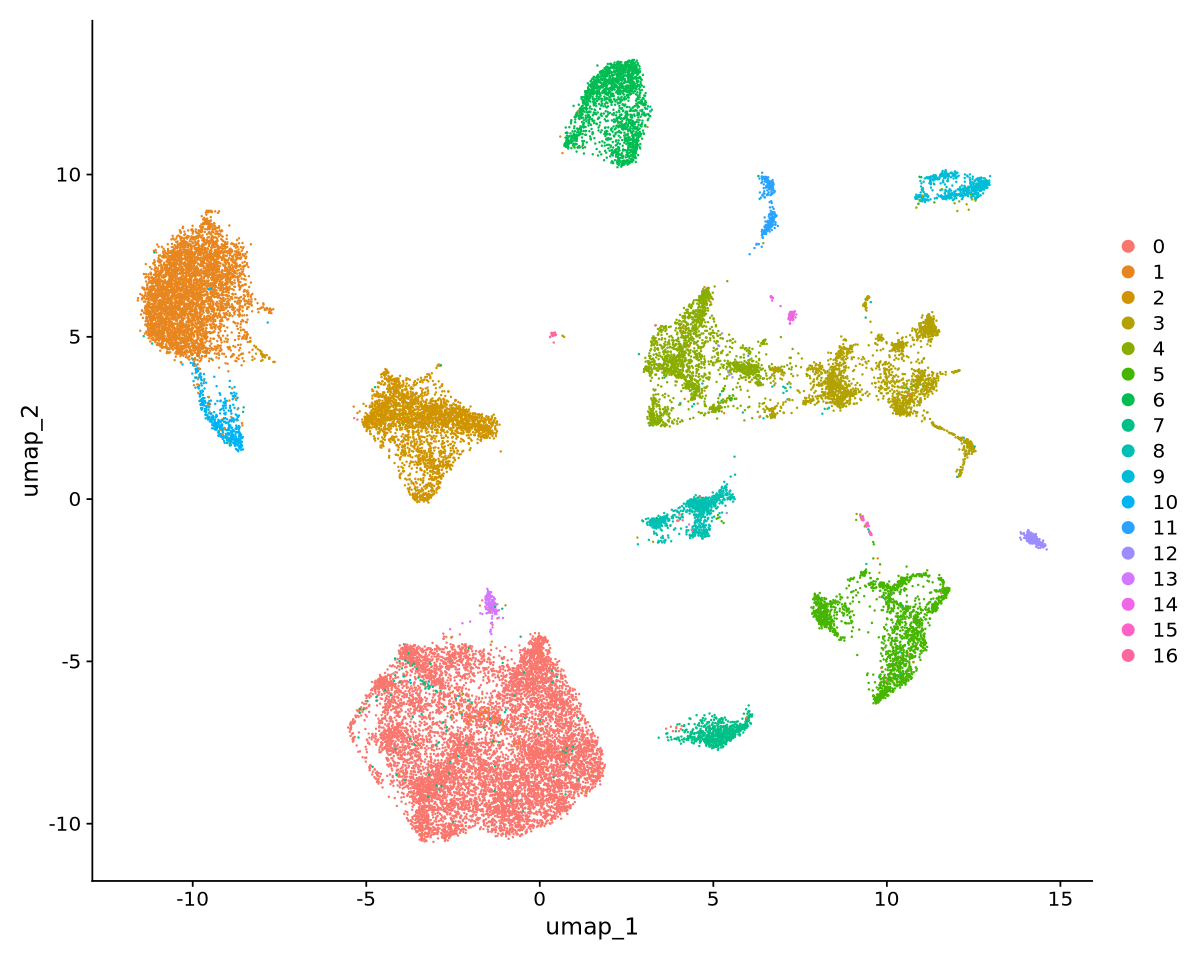

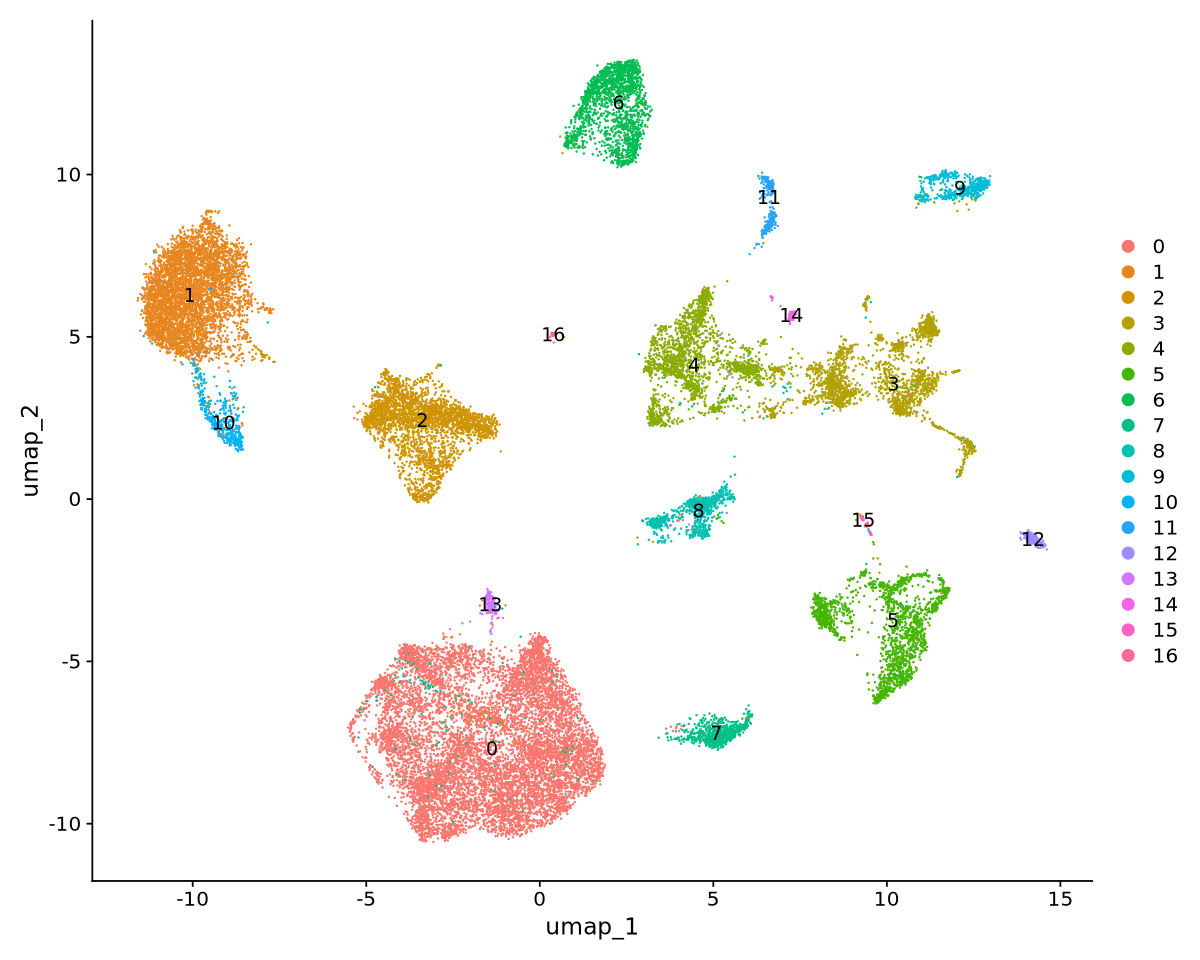

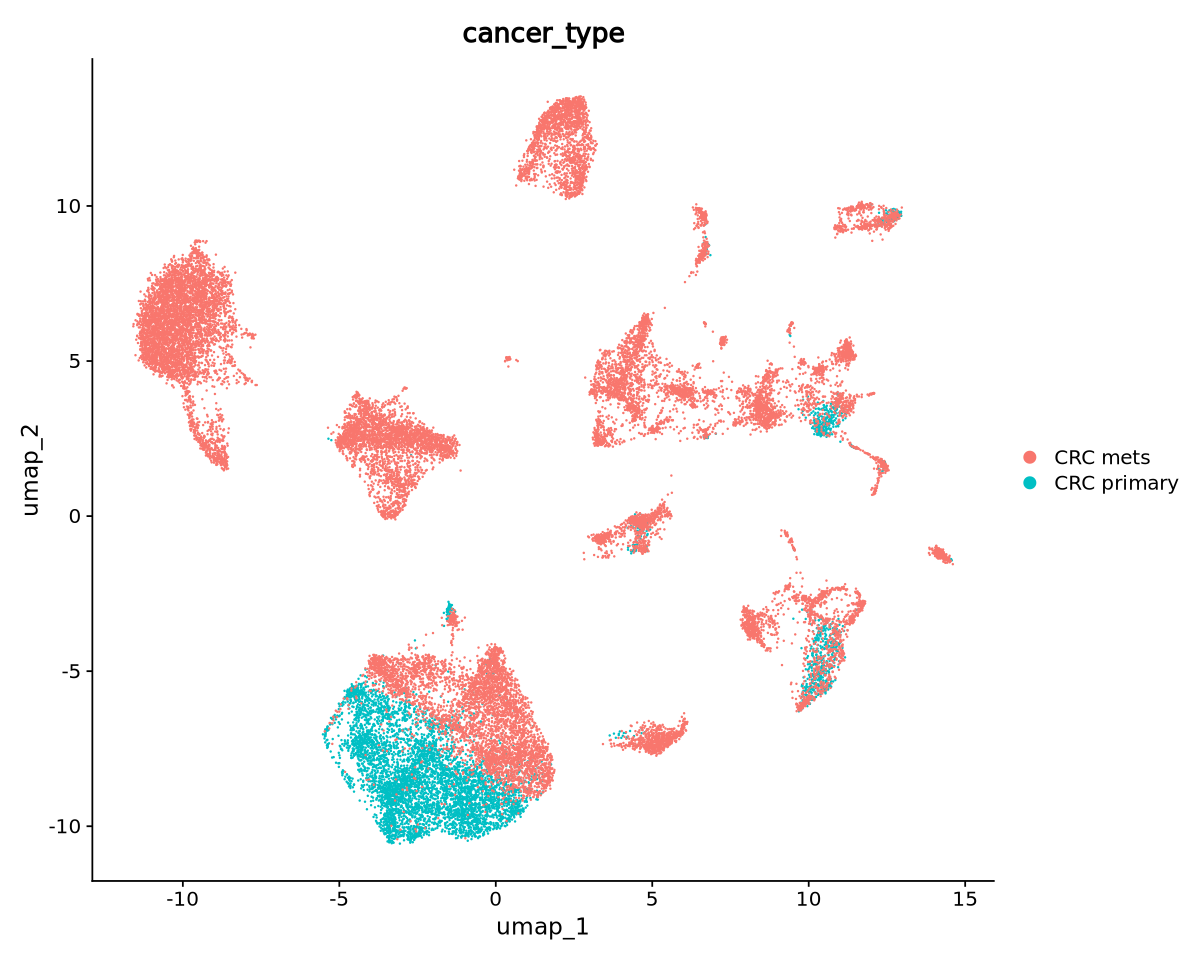

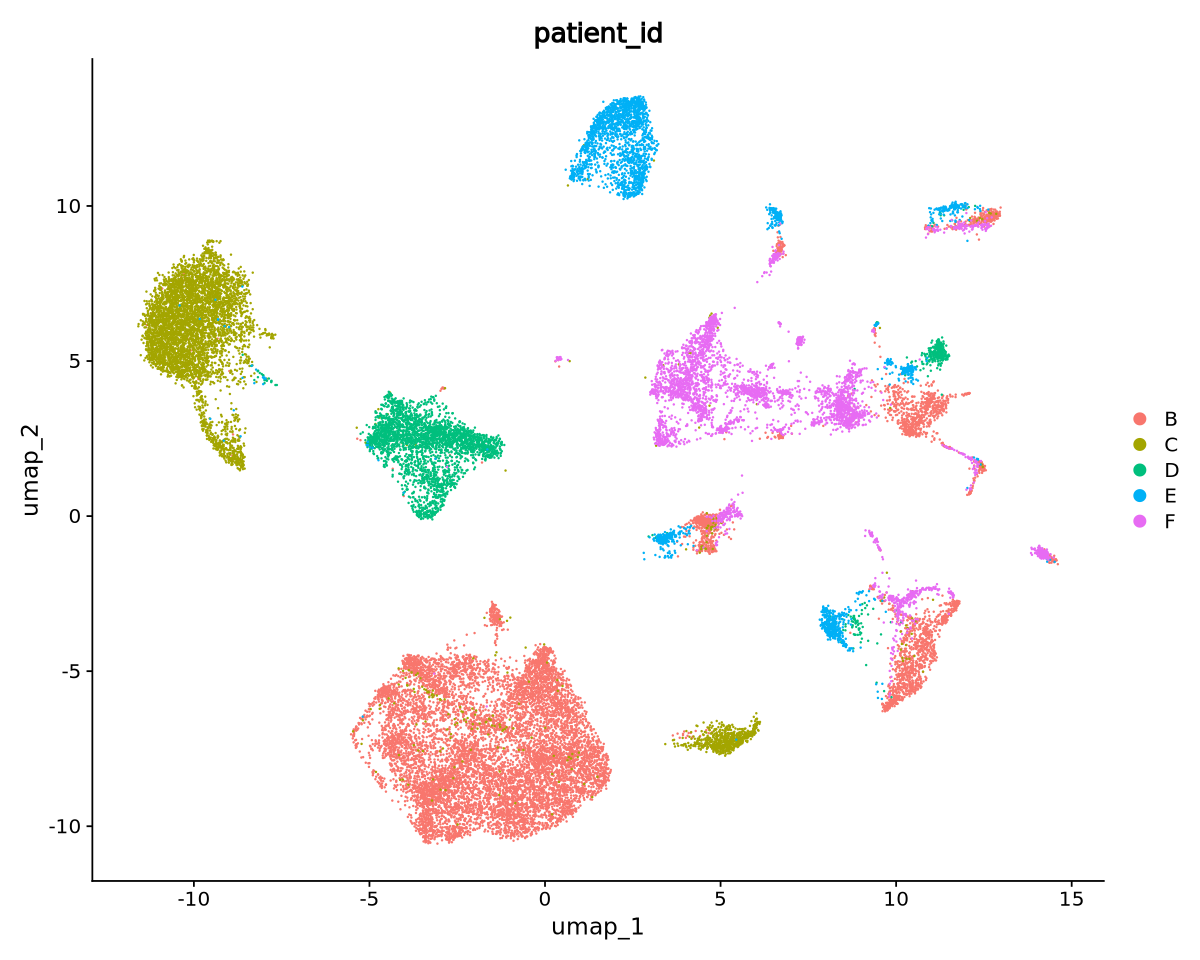

In [56]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(CRCt, reduction = "umap")
DimPlot(CRCt, reduction = "umap", label=TRUE)
DimPlot(CRCt, reduction = "umap", group = "cancer_type")
DimPlot(CRCt, reduction = "umap", group = "patient_id")

Note samples are seperating a lot by patient, keep in mind below

In [57]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(CRCt, file = "/scratch/user/s4436039/scdata/GSE183916/GSE183916.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

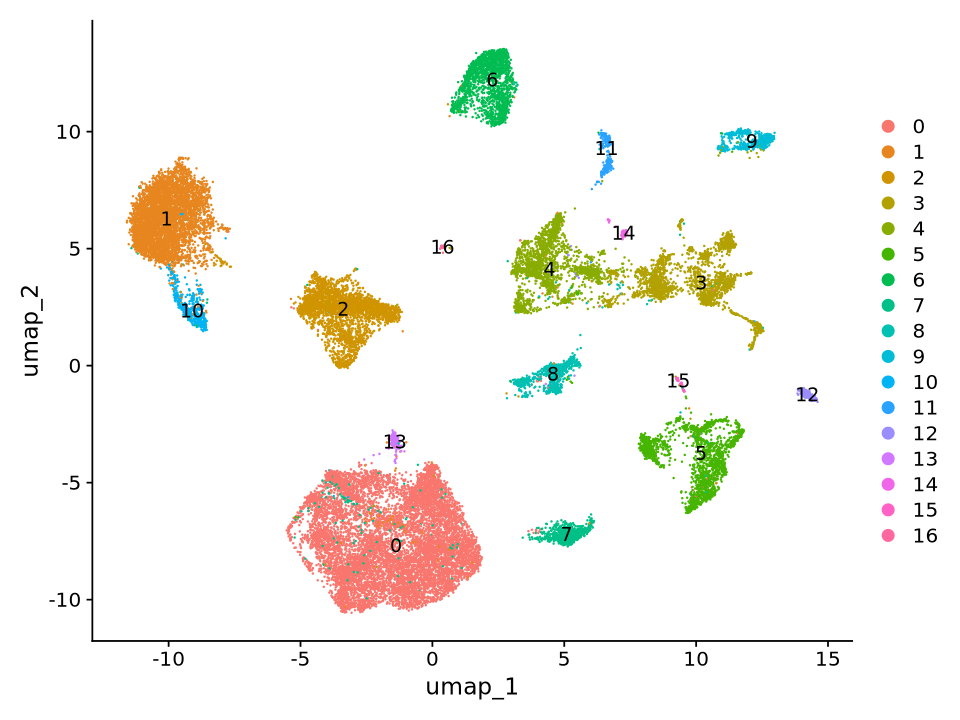

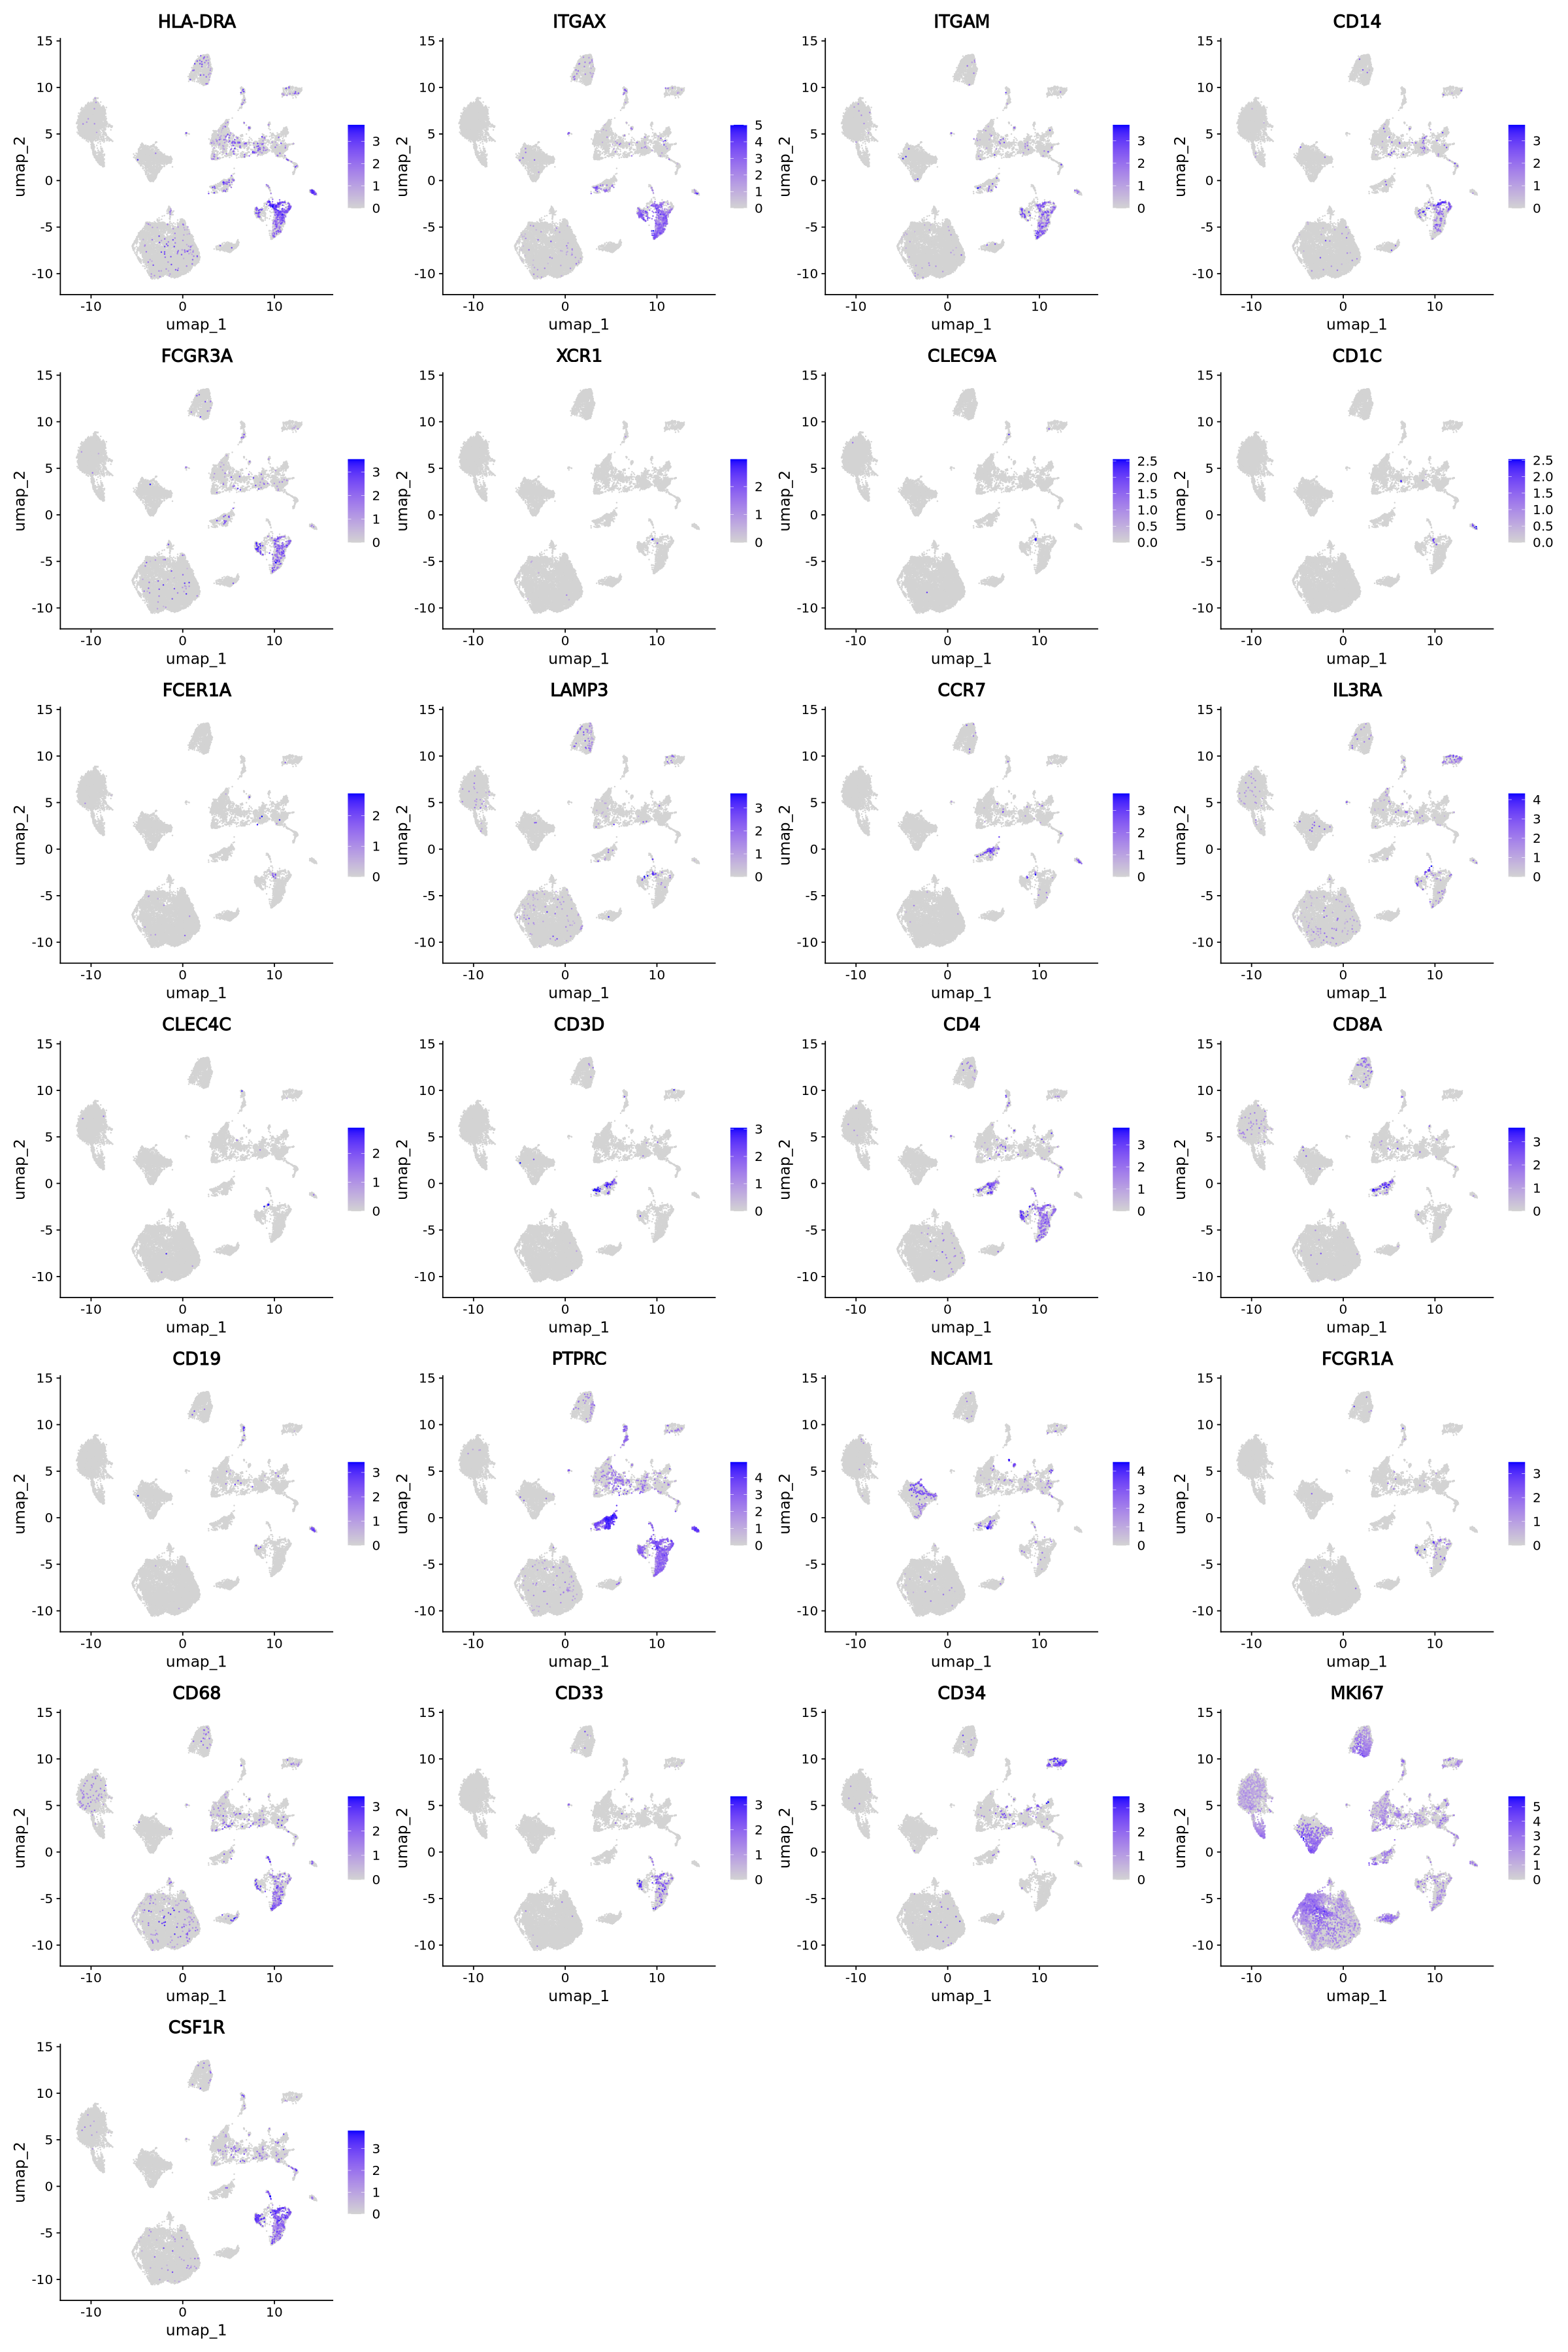

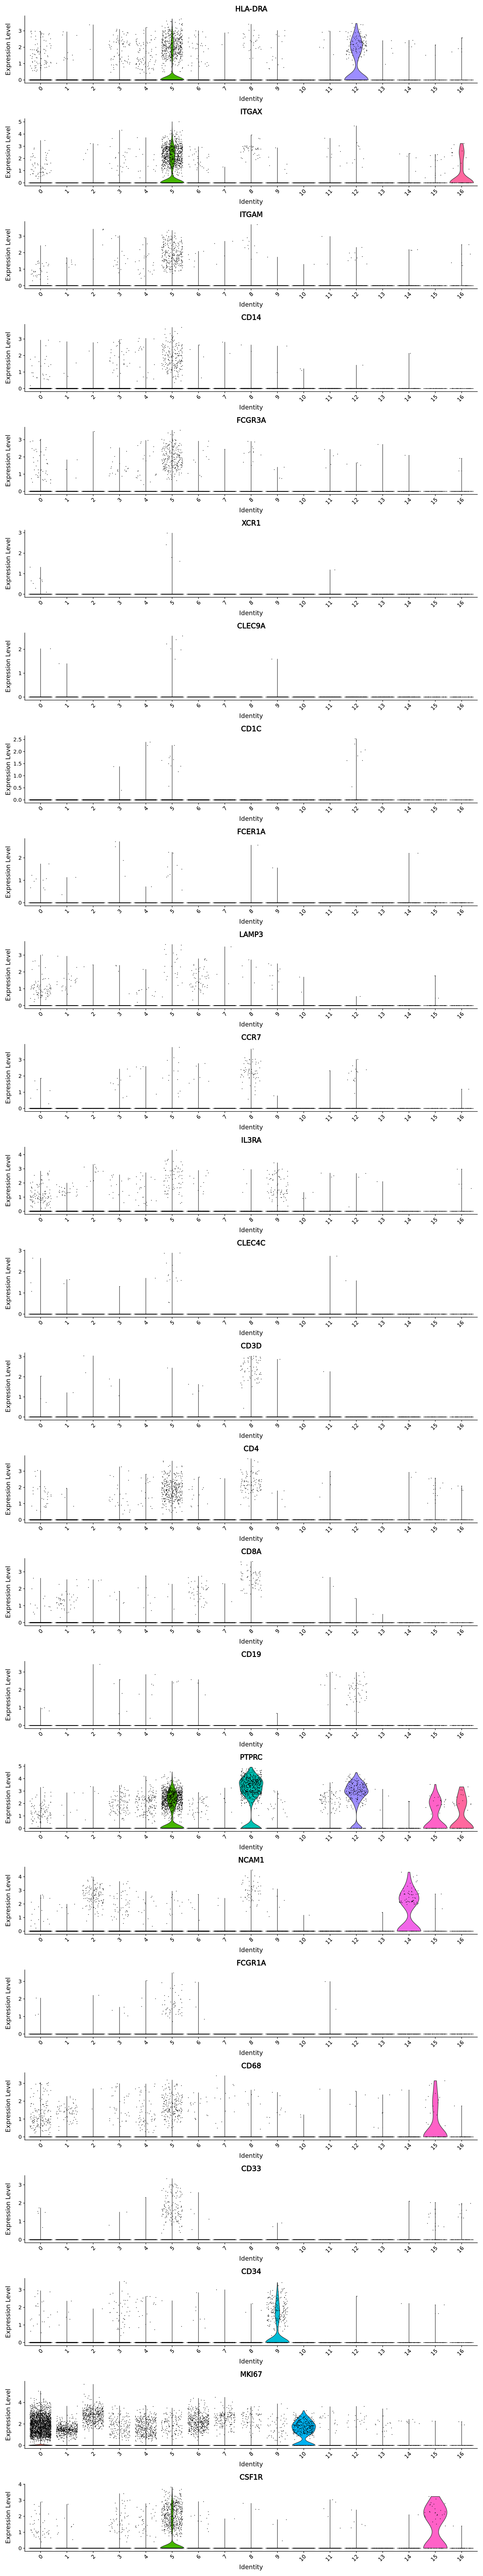

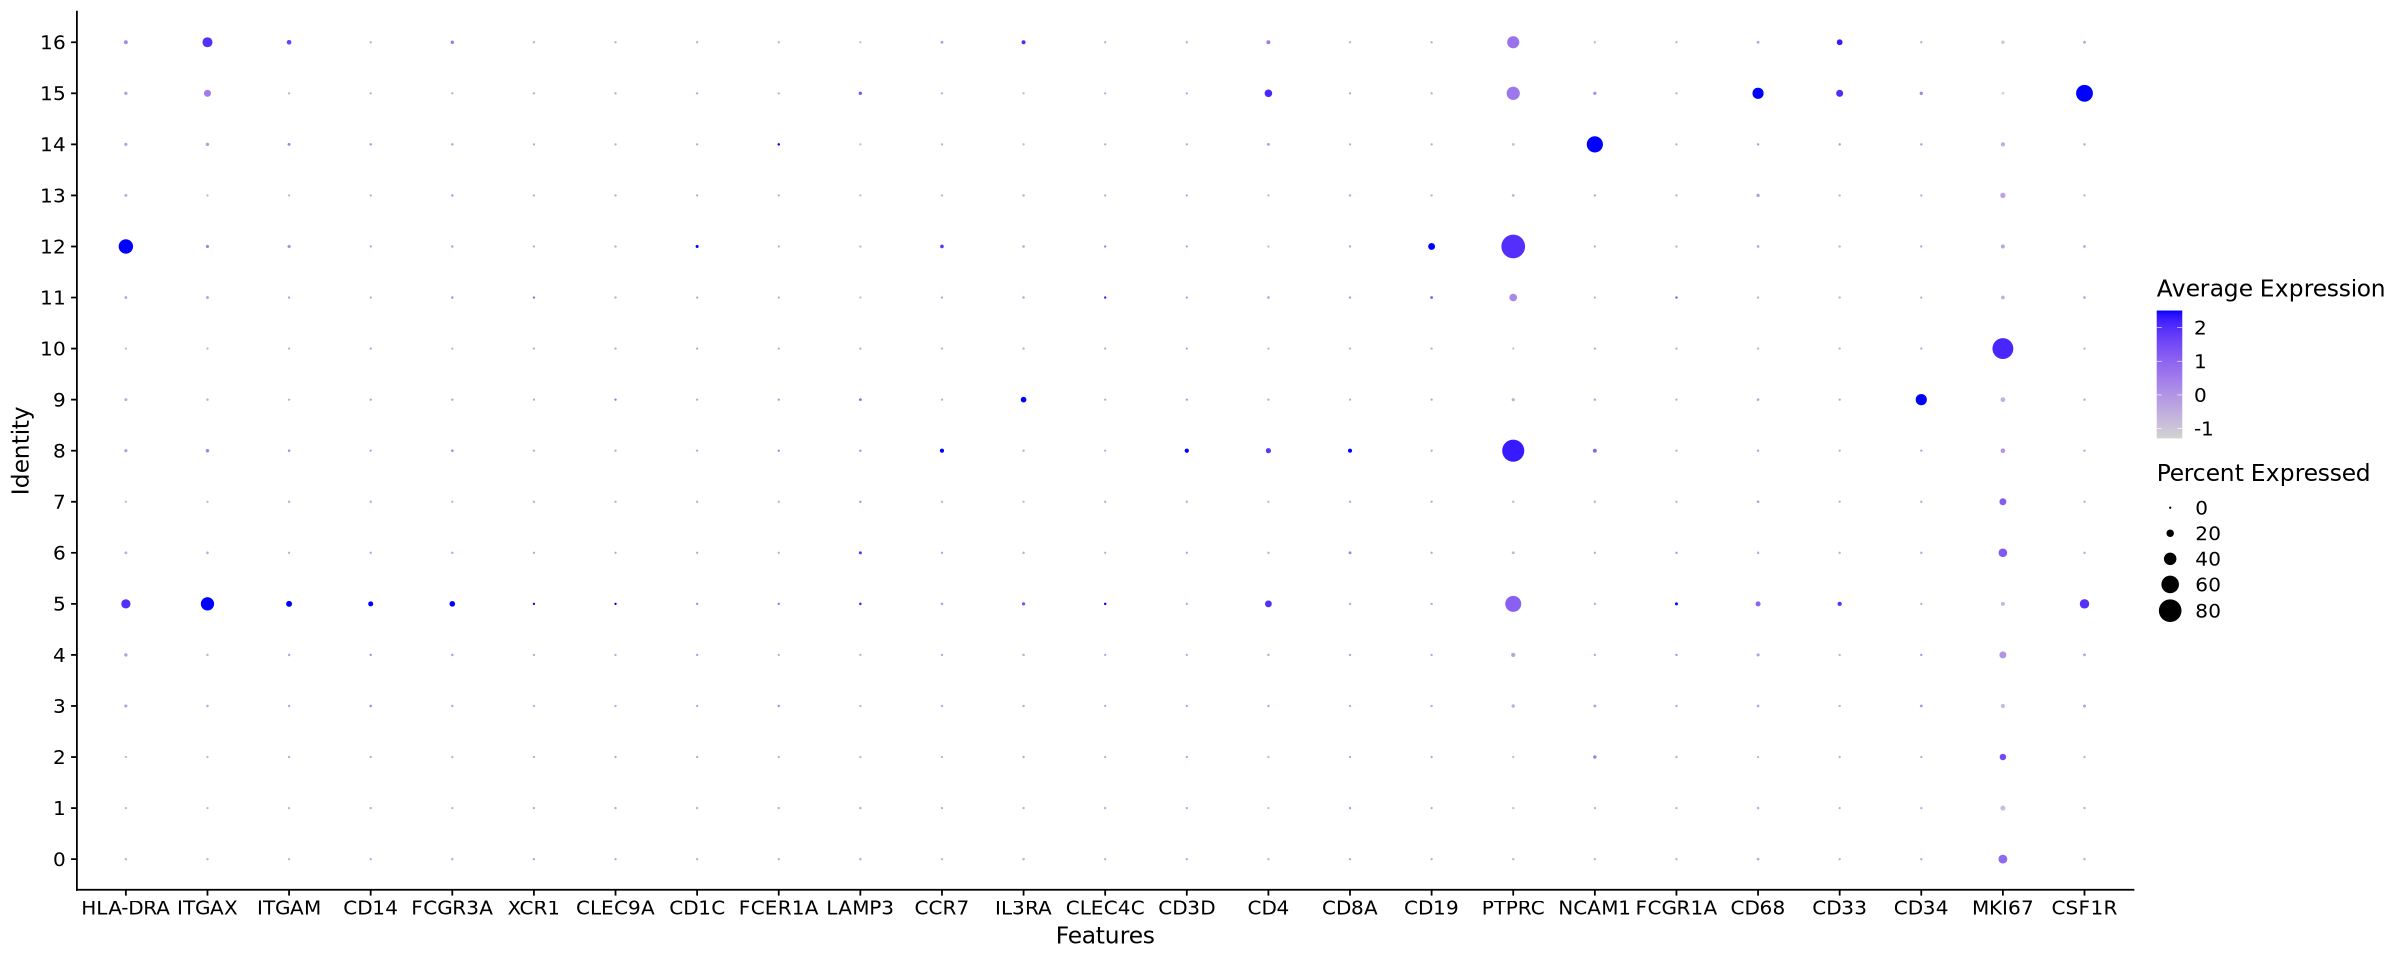

In [58]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(CRCt, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(CRCt, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(CRCt, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(CRCt, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 5 and 15 are the myeloid cells, now subsetting out these clusters

In [59]:
head(CRCt@meta.data)

orig.ident    nCount_RNA
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 SeuratProject  599      
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 SeuratProject  681      
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 SeuratProject  644      
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 SeuratProject 6088      
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 SeuratProject 5378      
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 SeuratProject 1700      
                                            nFeature_RNA loc     pat_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1  284         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1  511         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1  484         primary B     
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 3250         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 2846         primary B     
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 1146         primary B     
                                            sample_type cancer_type patient_id
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 tumour      CRC primary B         
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 tumour      CRC primary B         
                                            sample_id                
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 GSE183916_CRC_primary_ptB
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 GSE183916_CRC_primary_ptB
                                            percent.mt RNA_snn_res.0.2
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 0.8347245  1              
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 1.3215859  0              
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 1.8633540  0              
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 0.5091984  5              
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 0.3161026  0              
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 0.2941176  0              
                                            seurat_clusters
GSE183916_CRC_prim_ptB_AAACCTGAGAAGGTGA-1_1 1              
GSE183916_CRC_prim_ptB_AAACCTGAGAGGTTGC-1_1 0              
GSE183916_CRC_prim_ptB_AAACCTGAGCAATATG-1_1 0              
GSE183916_CRC_prim_ptB_AAACCTGAGTTACGGG-1_1 5              
GSE183916_CRC_prim_ptB_AAACCTGCACATCTTT-1_1 0              
GSE183916_CRC_prim_ptB_AAACCTGCAGCCTTTC-1_1 0

In [60]:
myeloid_CRCt <- subset(CRCt, subset = RNA_snn_res.0.2 %in% c("5","15"))

In [61]:
CRCt
myeloid_CRCt

An object of class Seurat 
33808 features across 28661 samples within 1 assay 
Active assay: RNA (33808 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
33808 features across 1934 samples within 1 assay 
Active assay: RNA (33808 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [62]:
saveRDS(myeloid_CRCt, "/scratch/user/s4436039/scdata/GSE183916/GSE183916_myeloid.RDS")

#### Following the above then need to move entire GSE183916 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE183916/ /QRISdata/Q5935/nikita/scdata/GSE183916
```